# Lógica de programação II - Programação Funcional I

Na aula de hoje iremos explorar os seguintes tópicos em Python:

- Importando módulos em Python
- Expressões geradoras
- Funções anônimas (lambda)
- Filter
- Map
- Reduce

# Importando módulos em Python

Muitos dos problemas de programação já foram resolvidos por outras pessoas, por exemplo calcular o `log` de um número. Por este motivo diversas linguagens de programação, como Python e JavaScript, apresentam bibliotecas que facilitam o uso dessas funcionalidades sem a necessidade de programar do zero!

Nas linguagens mais populares, há uma grande comunidade que desenvolve esses módulos facilitando ainda mais o nosso dia-a-dia, como por exemplo o `numpy`, `pandas` e o `matplotlib`, bibliotecas que iremos explorar nos próximos módulos!

Para utilizar esses módulos, há três principais fontes:
- As bibliotecas já distribuídas com o Python. Para saber mais temos a [PEP206](https://peps.python.org/pep-0206/)
  - [Biblioteca padrão](https://docs.python.org/3/library/)
- Bibliotecas de terceiros disponíveis pelo [PyPi](https://pypi.org/)
- A última é o [github](https://github.com/)

Para instalar módulos de terceiros podemos utilizar podemos utilizar o comando:
`pip install <nome do pacote>`

`conda install <nome do pacote>`

Um detalhe é que o utilizando o `conda` nem sempre o pacote está disponível, mas está disponível no PyPi, sendo o `pip` a única alternativa.

Para importar um módulo utilizamos:

`import <nome do módulo>`

`from <nome do módulo> import <nome do submódulo>`

Ambos irão disponibilizar o pacote para serem utilizados na forma de código. A principal diferença é que no `from ... import ...` utilizamos menos memória, já que somente uma parte do módulo será importado, sendo uma boa prática a ser realizada.

In [ ]:
!pip install xgboost==1.7.6
!pip install pandas
!pip install matplotlib

In [ ]:
pip uninstall xgboost

In [ ]:
!pip show pandas

In [ ]:
!pip freeze

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys

from timeit import default_timer as timer

In [2]:
tempo_inicial = timer()
for i in range(10000):
    pass
tempo_final = timer()

print('Tempo de execução: ', tempo_final - tempo_inicial)

Tempo de execução:  0.0002176670022890903


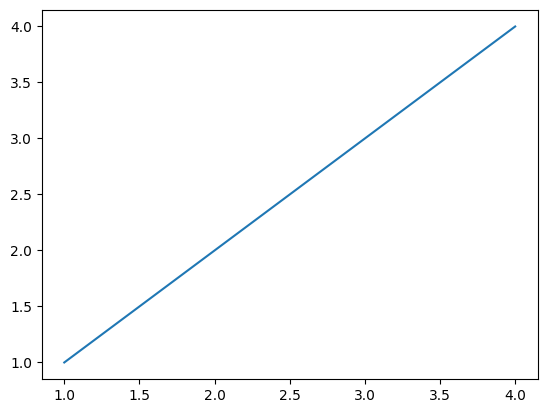

In [3]:
plt.plot([1, 2, 3, 4], [1, 2, 3, 4])

### Funções geradoras

Expressões gerados são uma forma compacta de criar iteradores. 

Funções geradoras são parecidas com funções convencionais, mas no lugar de `return` utilizamos a palavra `yield`.

A função irá retornar um iterador, e iremos utilizar a função `next` para pegar o próximo resultado.

In [4]:
def nome_da_funcao(parametro_1):
    print(parametro_1)
    return parametro_1

In [5]:
nome_da_funcao(1)

1


1

In [6]:
def funcao_geradora():
    print('Primeiro retorno')
    yield 1

    print('Segundo retorno')
    yield 2

In [7]:
gerador = funcao_geradora()

In [8]:
print(type(funcao_geradora()))
print(type(range(100)))

<class 'generator'>
<class 'range'>


In [9]:
next(gerador)

Primeiro retorno


1

In [10]:
next(gerador)

Segundo retorno


2

In [11]:
next(gerador)

StopIteration: 

**Quanto não houver mais `yield` ocorre uma excessão `StopIteraction`**

Porém perceba que a palavra `fim` foi imprimida, ou seja a função é executada, porém sem retorno.

In [12]:
def funcao_geradora_com_fim():
    for elemento in funcao_geradora():
        print(elemento)

In [13]:
funcao_geradora_com_fim()

Primeiro retorno
1
Segundo retorno
2


In [14]:
next(funcao_geradora())

Primeiro retorno


1

Podemos mimetizar a função range de python!

In [15]:
def minha_funcao_range(quantidade_numeros):
    x = 0
    while x < quantidade_numeros:
        print(f'Inicio, x={x}, qtd_numeros={quantidade_numeros}')
        yield x

        x += 1
        print(f'Depois do yield, x={x}, qtd_numeros={quantidade_numeros}')

In [16]:
lista_range = minha_funcao_range(5)
primeiro_elemento = next(lista_range)
print(primeiro_elemento)

Inicio, x=0, qtd_numeros=5
0


In [17]:
next(lista_range)

Depois do yield, x=1, qtd_numeros=5
Inicio, x=1, qtd_numeros=5


1

In [18]:
lista_range_2 = minha_funcao_range(5)
list(lista_range_2)

Inicio, x=0, qtd_numeros=5
Depois do yield, x=1, qtd_numeros=5
Inicio, x=1, qtd_numeros=5
Depois do yield, x=2, qtd_numeros=5
Inicio, x=2, qtd_numeros=5
Depois do yield, x=3, qtd_numeros=5
Inicio, x=3, qtd_numeros=5
Depois do yield, x=4, qtd_numeros=5
Inicio, x=4, qtd_numeros=5
Depois do yield, x=5, qtd_numeros=5


[0, 1, 2, 3, 4]

**Caso de uso**

- Web Scraping: pode ser utilizada para enviar links de resposta para uma função tratar o html
- Ambiente com baixa disponibilidade de memória

**Geradores** apresentam um padrão preguiçoso (lazy).

Ou seja, o código não é executado até que seja necessário. Esse é um padrão diferente das funções que criamos até agora, em que todo o código era executado assim que fosse solicitado (eager evaluation).

Quando temos problemas de memória, é comum utilizarmos os geradores. Quando a memória não é um problema, optamos pelo *eager evaluation* por apresentar, em geral, uma performance melhor.

Geradores são muito interessantes e apresentam algumas vantagens como publish-subscribe.

Para saber mais temos [essa palestra do PyCon de David Beazley em inglês](https://www.youtube.com/watch?v=D1twn9kLmYg)

In [19]:
print(list(range(10)))
print(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
range(0, 10)


In [20]:
# getsizeof retorna em bytes
print(sys.getsizeof(1000))
print(sys.getsizeof([10, 2, 2]))

28
88


In [21]:
def pegue_tamanho_memoria(operacao, quantidade_elementos):
    if operacao == 'lista':
        return sys.getsizeof(list(range(quantidade_elementos)))
    else:
        return sys.getsizeof(range(quantidade_elementos))

In [22]:
tamanhos_range = []
tamanhos_lista = []

for numero in range(1, 10000):
    tamanhos_range.append(pegue_tamanho_memoria('range', numero))
    tamanhos_lista.append(pegue_tamanho_memoria('lista', numero))

In [23]:
print('Final da lista em memória:', tamanhos_lista[-1])
print('Final do range em memória:', tamanhos_range[-1])

Final da lista em memória: 80056
Final do range em memória: 48


In [24]:
df_tamanhos = pd.DataFrame({
    'lista': tamanhos_lista,
    'range': tamanhos_range
})

# [{'coluna_1': 'valor', 'coluna_2': 'valor'}, {'coluna_1': 'valor_1', 'coluna_2': 'valor_1'}]
df_tamanhos

,lista,range
0,72,48
1,72,48
2,88,48
3,88,48
4,104,48
...,...,...
9994,80024,48
9995,80024,48
9996,80040,48
9997,80040,48


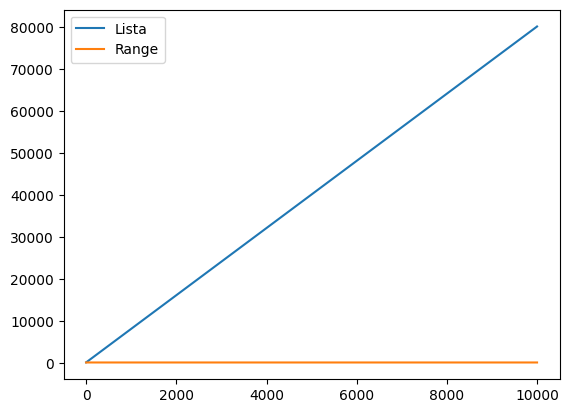

In [25]:
plt.plot(df_tamanhos.index.values, df_tamanhos['lista'])
plt.plot(df_tamanhos.index.values, df_tamanhos['range'])

plt.legend(['Lista', 'Range'])
plt.show()

In [26]:
print(type(df_tamanhos.iterrows()))
for i in df_tamanhos.iterrows():
    print(i)

<class 'generator'>
(0, lista    72
range    48
Name: 0, dtype: int64)
(1, lista    72
range    48
Name: 1, dtype: int64)
(2, lista    88
range    48
Name: 2, dtype: int64)
(3, lista    88
range    48
Name: 3, dtype: int64)
(4, lista    104
range     48
Name: 4, dtype: int64)
(5, lista    104
range     48
Name: 5, dtype: int64)
(6, lista    120
range     48
Name: 6, dtype: int64)
(7, lista    120
range     48
Name: 7, dtype: int64)
(8, lista    136
range     48
Name: 8, dtype: int64)
(9, lista    136
range     48
Name: 9, dtype: int64)
(10, lista    152
range     48
Name: 10, dtype: int64)
(11, lista    152
range     48
Name: 11, dtype: int64)
(12, lista    168
range     48
Name: 12, dtype: int64)
(13, lista    168
range     48
Name: 13, dtype: int64)
(14, lista    184
range     48
Name: 14, dtype: int64)
(15, lista    184
range     48
Name: 15, dtype: int64)
(16, lista    200
range     48
Name: 16, dtype: int64)
(17, lista    200
range     48
Name: 17, dtype: int64)
(18, lista    216


In [48]:
# Converter os dados em um tipo Byte -> novo_dado = dado_alterior / 8
df_tamanhos_copia = df_tamanhos.copy()

for indice, valores in df_tamanhos_copia.iterrows():
    valores[0] = valores[0] / 8
    valores[1] = valores[1] / 8
display(df_tamanhos_copia)

df_tamanhos_copia = df_tamanhos.copy()
df_tamanhos_copia['lista'] = df_tamanhos_copia['lista'] // 8
# display(df_tamanhos_copia['lista'])

df_tamanhos_copia['range'] = df_tamanhos_copia['range'].apply(lambda x: x // 8)
df_tamanhos_copia['nova_coluna'] = df_tamanhos_copia['range'] + df_tamanhos_copia['lista']
df_tamanhos_copia['nova_coluna_lista'] = df_tamanhos_copia['lista']/df_tamanhos_copia['nova_coluna']
df_tamanhos_copia

,lista,range
0,9,6
1,9,6
2,11,6
3,11,6
4,13,6
...,...,...
9994,10003,6
9995,10003,6
9996,10005,6
9997,10005,6


,lista,range,nova_coluna,nova_coluna_lista
0,9,6,15,0.600000
1,9,6,15,0.600000
2,11,6,17,0.647059
3,11,6,17,0.647059
4,13,6,19,0.684211
...,...,...,...,...
9994,10003,6,10009,0.999401
9995,10003,6,10009,0.999401
9996,10005,6,10011,0.999401
9997,10005,6,10011,0.999401


Esse comportamento ocorre por quê não geramos uma lista de fato com o generators. Ela apenas pode existir assim que executamos o código (next)!

**Podemos criar funções com generatos com for loops**

In [28]:
for elemento in funcao_geradora():
    print(elemento)

Primeiro retorno
1
Segundo retorno
2


In [29]:
[elemento for elemento in funcao_geradora()]

Primeiro retorno
Segundo retorno


[1, 2]

E segue a mesma lógica que list comprehension 

Com `if`:

`(<expressão> for <variavel> in <iteravel> if <condicao>`

In [30]:
numeros_par = (numero for numero in range(10) if numero % 2 == 0)
for par in numeros_par:
    print(par)

numeros_par = (numero for numero in range(10) if numero % 2 == 0)
print(next(numeros_par))

0
2
4
6
8
0


### Funções anônimas (lambda)

Funções anônimas, também conhecidas como funções lambda (ou lambda calculus). São funções que não necessáriamente precisam ser declaras, no caso de Python declaramos uma função com a palavra reservada `def`.

De onde vem:
- Inventado por Alonzo Church (1903-1995), supervisor de Allan Turing
  - O que é a noção de uma função de uma perspectiva computacional?
- Para Church uma função é uma caixa preta

Input -> Função -> Resultado

Inputs (X, Y) -> Função -> Resultado

Função matemática: $f(x) = x + 1$

Por ser uma caixa preta, não podemos analisar internamente.

Essas funções não guardam um estado interno, não há informações escondidas.

`lambda x: x+1`

`lambda x, y: x+y`

Em outras palavras, a função aceita algum parâmetro (input), realiza uma operação e retorna um valor e apenas um valor (int, float, list, tuplas, str).

Por que deveriamos estar interessados no lambda calculus?

- Pode encodar qualquer computação
  - Qualquer programa/função desenvolvida pode ser codificada utilizando o lambda calculus, note que pode ser extremamente ineficiente! Este não é o ponto, essa é uma idéia básica de computação, demonstrando que qualquer programa pode ser codificada dessa forma (Church-Turing hypothesis).
- É a base para linguagens de programação funcional (Haskell). Nessa linguagem, compila o código em partes pequenas, que são essencialmente uma forma de calculo lambda.
- Presente na maior parte de linguagens de programação (Python, C#, Java, etc).

Na programação funcional utilizamos muitas vezes a recursão de uma função, uma função que chama ela mesma até um estado pré-definido. 

Nos paradigmas de desenvolvimento de software temos a programação imperativa e declarativa.

![a](https://res.cloudinary.com/practicaldev/image/fetch/s--j_Sv4k3Y--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://dev-to-uploads.s3.amazonaws.com/uploads/articles/1r3e3w4xgj30b81zb4yu.png)

Computação
- Imperativa:
  - Instruções são descritas passo a passo de como o programa deve ser executado
- Declarativa:
  - As condições dos gatilhos de execução são ajustados para produção do resultado esperado (base case)

Leitura e complexidade
- Imperativa:
  - Foco no controle de fluxo, o passo-a-passo pode ser seguido de forma simples. Entretanto, adição de novas features e de código podem se tornar complexas, tornando o código confuso e consumir tempo para a leitura
- Declarativa
  - Passo-a-passo são evitados (recursão). É menos complexo e requer menos código, facilitando a leitura

Customização
- Imperativa
  - Fácil customização e edição de código. Controle completo de fácil adaptação a novas estruturas. Entretanto, mais código deverá ser produzido, podendo acarretar em maior número de erros (bugs)
- Declaritiva
  - Customização do código é mais dificil, por causa da sintaxe e dependências para a implemenação do código.

Optimização:
- Imperativa
  - Dificil de optimizar em comparação com a declarativa. Requer que o passo-a-passo seja investigado, requerindo mais código e maior possibilidade de cometer erros
- Declarativa
  - Fácil optimização do código

Estrutura:
- Imperativa
  - Pode ser longo e complexo. Por falta de boas práticas uma função pode performar mais de uma atividade
- Declarativa
  - Concisa e precisa, com falta de detalhes. Limita a complexidade do código e torna ele mais eficiente


**A sintaxe para a função lambda em Python é:**

`lambda <param>, <param2>, ...: <expressao>`

In [32]:
def soma_um(x):
    return x + 1

print(soma_um(1))

2


In [37]:
soma_um_funcional = lambda x: x + 1
print(type(soma_um_funcional))

print(soma_um_funcional(1))
print(soma_um_funcional(2))
print(soma_um_funcional(3))
print(soma_um_funcional(4))

<class 'function'>
2
3
4
5


In [33]:
lista_de_cursos = ['Engenharia de Software - B', 'Sistemas Operacionais - D', 'Engenharia de Dados - C']

nova_lista_de_cursos = []
for curso in lista_de_cursos:
    curso_sem_tipo = curso.split(' - ')[0]
    nova_lista_de_cursos.append(curso_sem_tipo)

print(nova_lista_de_cursos)

remove_tipo = lambda curso: curso.split(' - ')[0]
[remove_tipo(curso) for curso in lista_de_cursos]

['Engenharia de Software', 'Sistemas Operacionais', 'Engenharia de Dados']


['Engenharia de Software', 'Sistemas Operacionais', 'Engenharia de Dados']

In [37]:
soma = lambda x, y: x + y
print(soma(1, 2))
print(soma(190, 3042))

3
3232


In [38]:
e_par = lambda x: True if x % 2 == 0 else False
e_impar = lambda x: False if x % 2 == 0 else True

print(e_par(2))
print(e_impar(2))

True
False


In [39]:
multiplica_numeros = lambda lista: [x * indice for indice, x in enumerate(lista)]
multiplica_numeros([1, 2, 3])

[0, 2, 6]

In [44]:
meses = ['Janeiro', 'Fevereiro', 'Março']

dicionario_meses = {chave+1: mes for chave, mes in enumerate(meses)}
numero_para_mes = lambda num, dicionario_meses: dicionario_meses[num]

numero_para_mes(2, dicionario_meses)

'Fevereiro'

### Filter

A função filter permite que filtremos os dados apenas verdadeiros dado uma expressão


A sintaxe utilizada é:

`filter(<função>, <iteravel>)`

In [52]:
e_par = lambda x: True if x % 2 == 0 else False
todos_numeros = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
todos_numeros = [1, 1, 1, 1]

print(list(filter(e_par, todos_numeros)))

[]


In [51]:
lista_de_cursos = ['Engenharia de Software - B', 'Sistemas Operacionais - D', 'Engenharia de Dados - C']
filtra_tipo = lambda curso: True if curso.split(' - ')[1] == 'B' else False

print(list(filter(filtra_tipo, lista_de_cursos)))

['Engenharia de Software - B']


In [59]:
produtos = [
    {'produto': 'P1', 'categoria': 'moda'},
    {'produto': 'P2', 'categoria': 'alimento'},
    {'produto': 'P3', 'categoria': 'moda'},
]

e_moda = lambda dicinario: dicinario['categoria'] == 'moda'

print(list(filter(e_moda, produtos)))

dicionario_meses
procura_janeiro = lambda chave: True if dicionario_meses[chave] == 'Janeiro' else False

print(list(filter(procura_janeiro, [1, 2, 3])))

[{'produto': 'P1', 'categoria': 'moda'}, {'produto': 'P3', 'categoria': 'moda'}]
[1]


### Map

A função `map` permite que a gente mapeie uma função a ser aplicada a cada elemento da nossa coleção.

Assim como no `filter` ele retorna um iterador, precisando ser convertido o resultado no formato que queremos!

A sintaxe é:
`map(<funcao>, <iteravel>`)

In [65]:
soma_um = lambda x: x + 1

todos_numeros = [12, 2, 3, 4, 5]

print(list(map(soma_um, todos_numeros)))

print([soma_um(numero) for numero in todos_numeros])

[13, 3, 4, 5, 6]
[13, 3, 4, 5, 6]


In [70]:
pega_nome = lambda dicionario: dicionario['produto']

print(list(map(pega_nome, produtos)))
print(list(map(pega_nome, filter(e_moda, produtos))))

['P1', 'P2', 'P3']
['P1', 'P3']


### Reduce

O `reduce` permite a gente a reduzir os dados em uma única saída! Como parâmetros um valor inicial (acumulador), além da função de redução e do iterável.

A sintaxe é:
`reduce(<funcao>, <iteravel>, <valor inicial>)`

In [72]:
from functools import reduce

soma = lambda resultado, numero: resultado + numero

lista_numeros = [1, 3, 5, 6]
resultado = reduce(soma, lista_numeros, 0)
print(resultado)

15


![a](https://miro.medium.com/max/828/1*yD7P1I36G1jTProLQwEXxA.jpeg)